In [27]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import random

## Import cleaned data

In [22]:
reddit_combi_df = pd.read_csv(
    "Reddit_Combi_cleaned.csv",   
    )

reddit_title_df = pd.read_csv(    
    "Reddit_Title_cleaned.csv",    
)

twitter_full_df = pd.read_csv(
    "Twitter_Full_cleaned.csv",  
    )

twitter_non_advert = pd.read_csv(
    "Twitter_Non-Advert_cleaned.csv",
    )

df_files = [reddit_combi_df, reddit_title_df, twitter_full_df, twitter_non_advert]

In [23]:
df_names = ["Reddit combi", "Reddit title", "Twitter full", "Twitter non advert"]

# check that the columns are correct
for df in df_files:
    print(df.columns)

Index(['title', 'body', 'Body_Title', 'label'], dtype='object')
Index(['title', 'label'], dtype='object')
Index(['text', 'hashtags', 'label'], dtype='object')
Index(['text', 'label'], dtype='object')


In [24]:
# Rename column name for consistency
df_files[0] = df_files[0].rename(columns={"Body_Title": "body_title"})
df_files[0].columns

Index(['title', 'body', 'body_title', 'label'], dtype='object')

## Visualize distriution of positive and negative samples

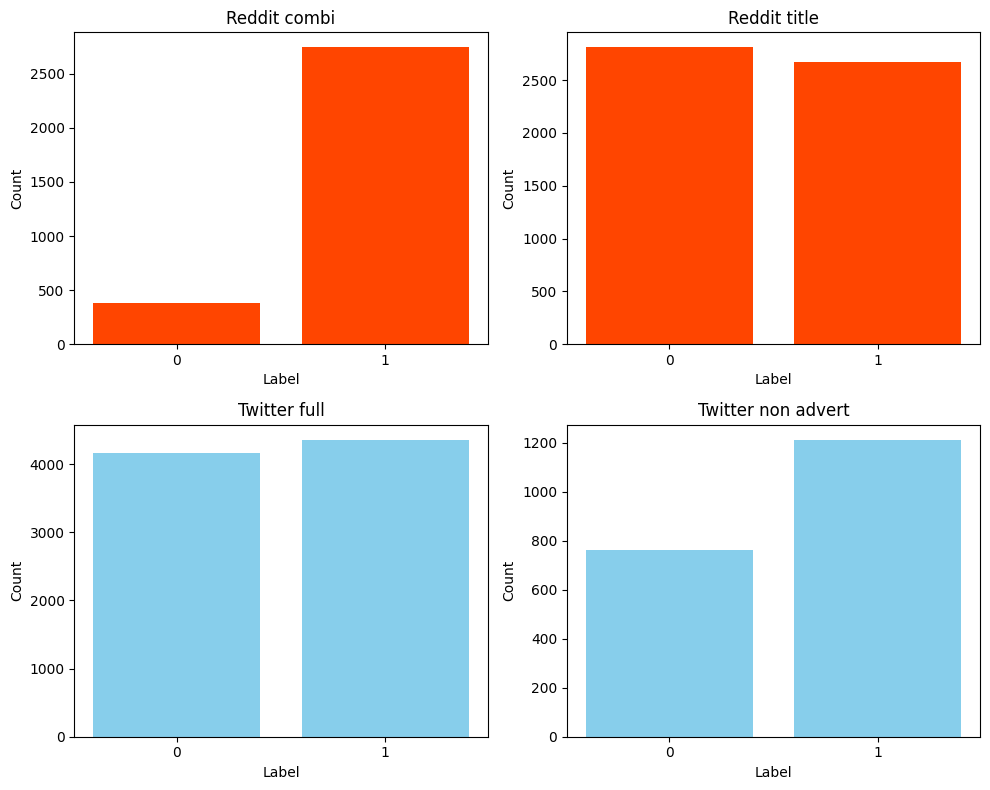

In [25]:
# histogram of label distribution for each dataframe
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = [ax0, ax1, ax2, ax3]

for ax, df, title in zip(axes, df_files, df_names):
    if ax == ax0 or ax == ax1:
        color = "orangered"
    else:
        color="skyblue"
    ax.hist(df["label"], bins=[-0.5, 0.5, 1.5], rwidth=0.8, color=color)
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xlabel("Label")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

- Reddit combi contains under 500 negative examples, which is quite little compared to positive examples (>2500)
- Reddit title and Twitter full have around same number of positive and negative examples 
- Twitter non-advert has fewer negative examples, but the difference is not that significant 
- The imbalances of classes must be considered.

## Lengths of text

Plot mean and median legths of texts

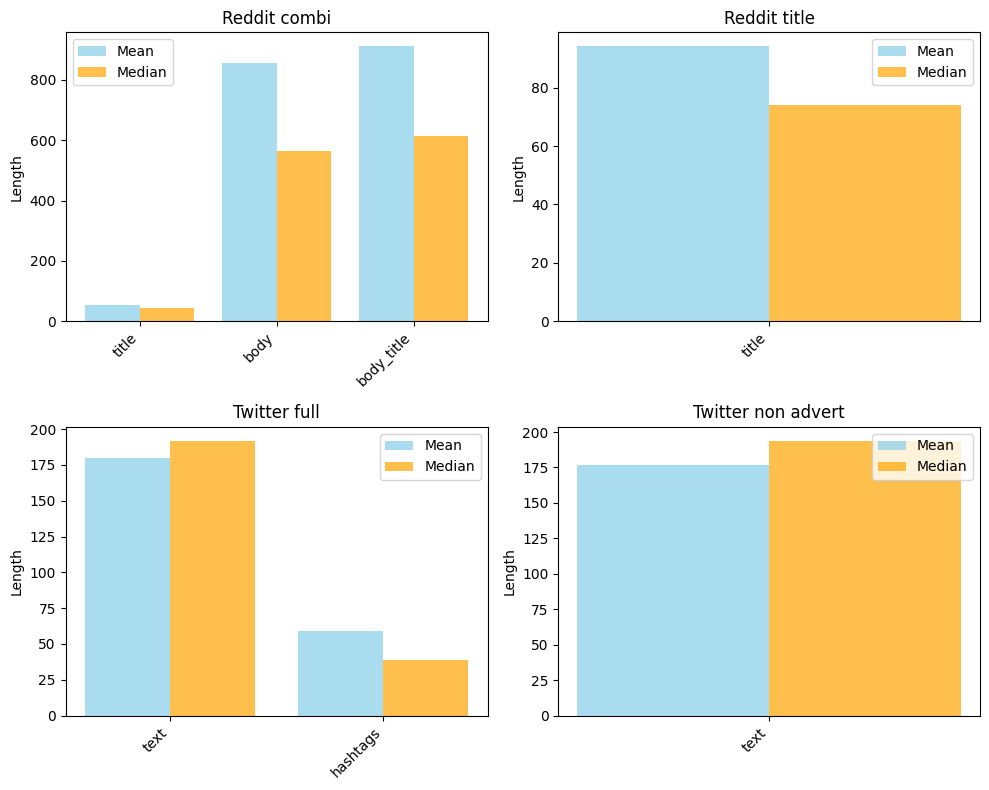

In [26]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = [ax0, ax1, ax2, ax3]

for ax, df, title in zip(axes, df_files, df_names):
    
    # collect mean and median length over columns
    length_stats = {}
    for col in df.columns:
        if col != "label":
            lengths = df[col].astype(str).str.len()
            length_stats[col] = {
                "mean": lengths.mean(),
                "median": lengths.median()
            }
    
    cols = list(length_stats.keys())
    means = [length_stats[c]["mean"] for c in cols]
    medians = [length_stats[c]["median"] for c in cols]

    x = range(len(cols))
    
    ax.bar(x, means, width=0.4, label="Mean", alpha=0.7, color="skyblue")
    ax.bar([i + 0.4 for i in x], medians, width=0.4, label="Median", alpha=0.7, color="orange")

    ax.set_xticks([i + 0.2 for i in x])
    ax.set_xticklabels(cols, rotation=45, ha="right")

    ax.set_title(title)
    ax.set_ylabel("Length")

    ax.legend()
plt.tight_layout()
plt.show()

- Reddit combi has significantly longer body and body title than others. Large mean suggests there are some significantly longer examples
- Reddit title has quite short title texts
- Twitter full and Twitter non adert have moderate long texts and mean and median are approximately the same, suggesting there are no significant outliers based on length of text

## Stress-positive and stress-negative posts

- Randomly select stress-postitive and stress-negative examples from each dataset

In [31]:
# show whole output text
with pd.option_context(
    "display.max_colwidth", None,    
    "display.max_rows", None,        
    "display.width", 200   
):
    for i in range(len(df_files)):
        print(df_names[i], ":\n")
        pos = df_files[i][df_files[i]["label"] == 1].sample(n=1, random_state=42)
        neg = df_files[i][df_files[i]["label"] == 0].sample(n=1, random_state=42)

        print("Stress-positive:\n", pos, "\n")
        print("Stress-negative:\n", neg, "\n\n")

Reddit combi :

Stress-positive:
                   title  \
520  i messed up so bad   

                                                                                                                                                                                                                                                          body  \
520  i feel horrible i messed up so bad and i feel horrible but i can never undo what i said. i don’t know what to do i don’t want to live like this anymore i just want to leave forever and never have to think about my life again i want it all to go away   

                                                                                                                                                                                                                                                                       body_title  \
520  i messed up so bad i feel horrible i messed up so bad and i feel horrible but i can never undo what i said. i do

- Stress-positive examples show anxiety, negative adjectives such as "unfairly", senstive topics such as amputation and mental health 
- Stress-negative examples shos joy, poitive adjectives such as "happy", objectively happy hashtags, such as roses, floers, nature, christmas